In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
df = pd.read_csv('Diwali_Sales_Data.csv', encoding = 'latin1')
df.shape

(11251, 15)

In [18]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data Cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [21]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [23]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [31]:
df.shape

(11251, 13)

In [33]:
df.dropna(inplace = True)

In [37]:
df.shape

(11239, 13)

In [39]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [43]:
df['Amount'] = df['Amount'].astype('int')

In [45]:
df['Amount'].dtypes

dtype('int32')

In [47]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [56]:
df.rename(columns = {'Marital_Status':'Married'}, inplace = True)

In [58]:
df.describe()

,User_ID,Age,Married,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [53]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## EDA

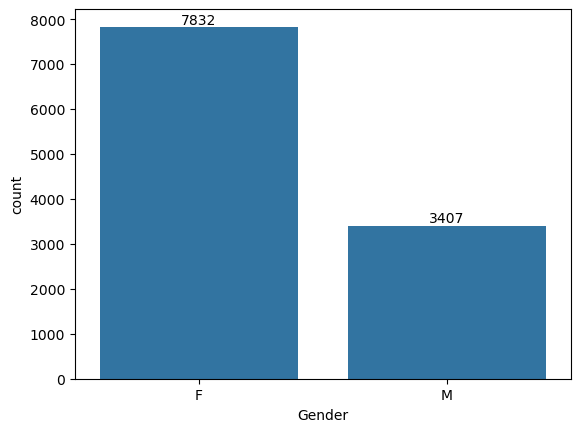

In [64]:
# Gender

ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

##### There are more Female customers who purchase something than Males

In [68]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

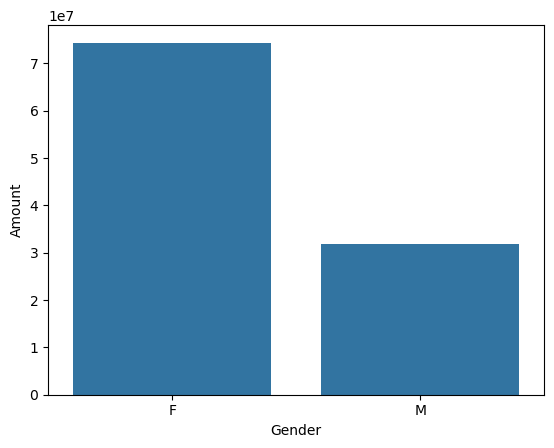

In [70]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

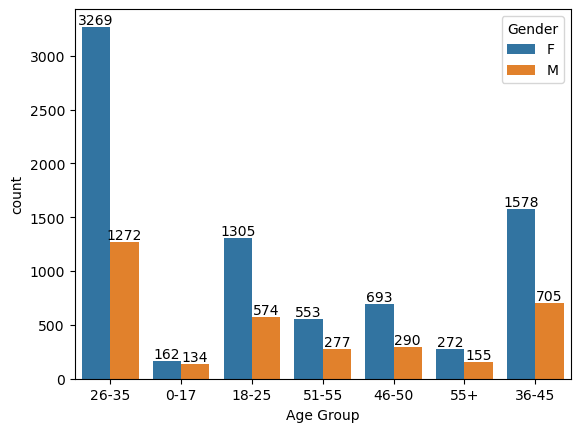

In [74]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

##### From the above graph, it is clear that the females from age group 26-35 does more shopping than other age groups from our store

<Axes: xlabel='Age Group', ylabel='Amount'>

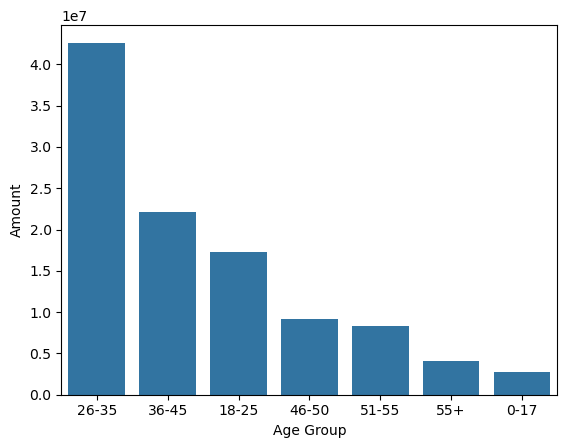

In [76]:
# Total Amount vs Age group

sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

##### From the above graph, it is clear that the age group 26-35 does more shopping than other age groups

In [78]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Married', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

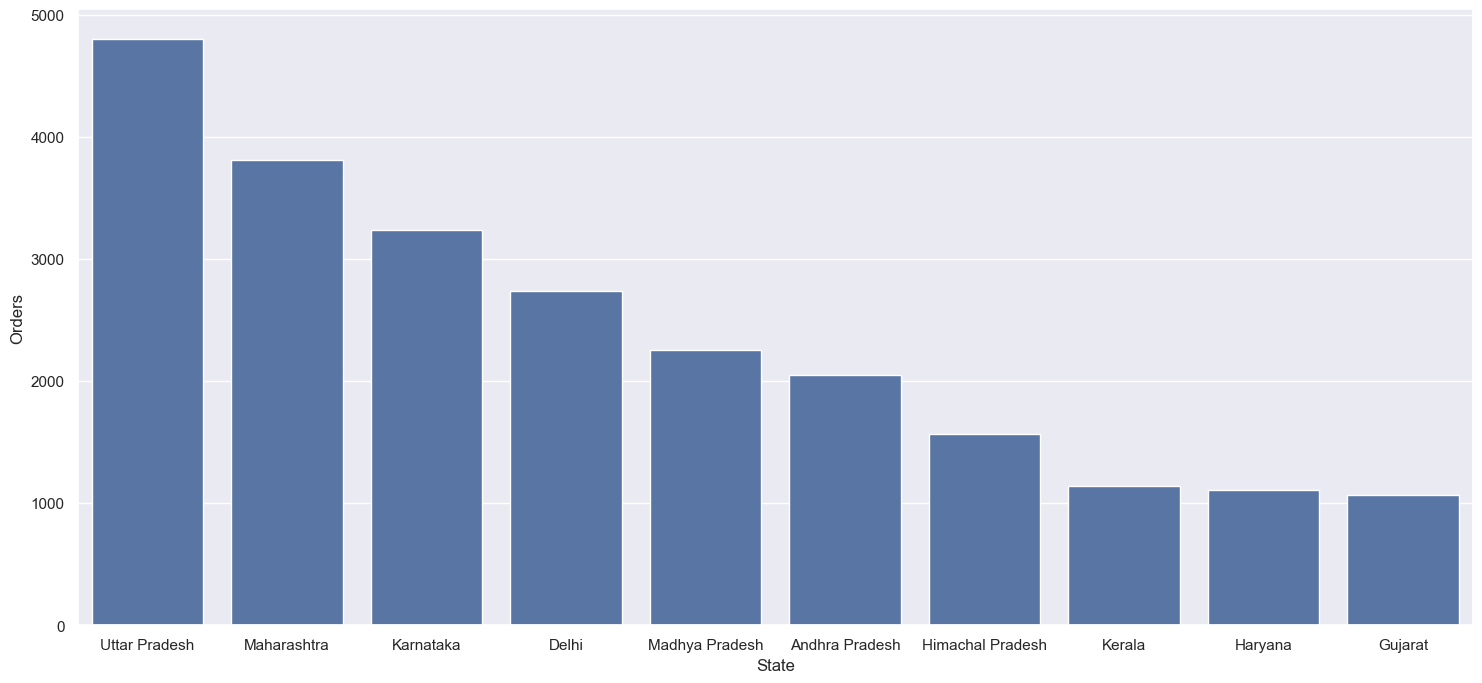

In [92]:
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize':(18,8)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders')

##### From the above graph we can clearly see that the peoples of Uttar Pradesh, Maharashtra and Karnataka are our most frequent customers

<Axes: xlabel='State', ylabel='Amount'>

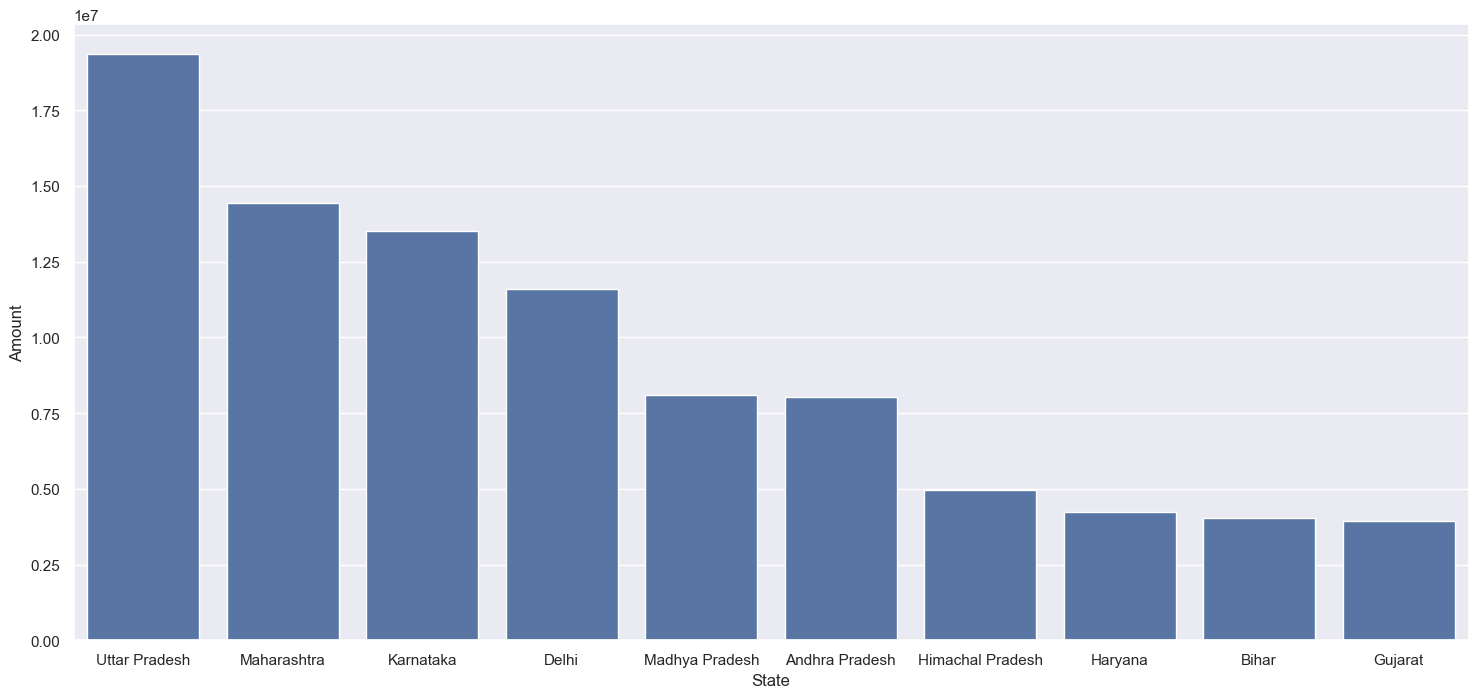

In [94]:
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(18,8)})
sns.barplot(data=sales_state, x = 'State', y = 'Amount')

#### From the above graph, we can see that the peoples from UP, Maharashtra and Karnataka spends more money than any other states

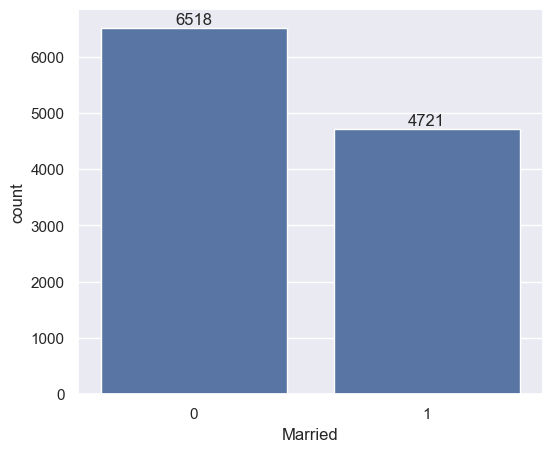

In [102]:
ax = sns.countplot(data = df, x = 'Married')
sns.set(rc = {'figure.figsize':(6,4)})
for bars in ax.containers:
    ax.bar_label(bars)

This above bar graph with labels shows tha most of our customers are not married

<Axes: xlabel='Married', ylabel='Amount'>

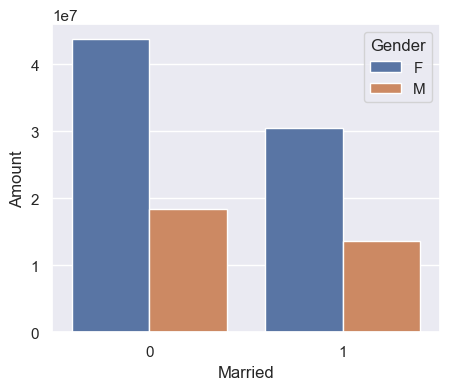

In [106]:
sales_state = df.groupby(['Married','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc = {'figure.figsize':(5,4)})
sns.barplot(data = sales_state, x = 'Married', y = 'Amount', hue = 'Gender')

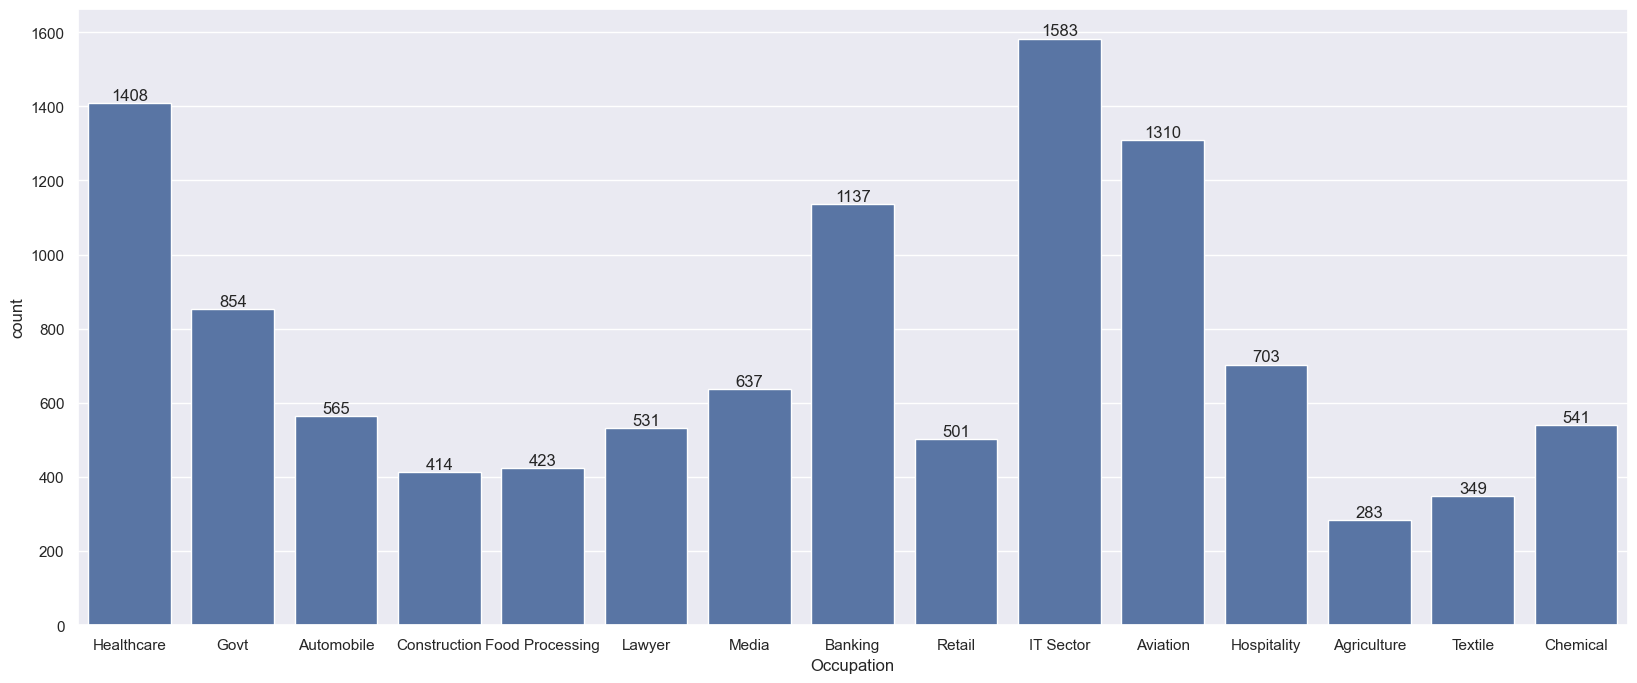

In [110]:
sns.set(rc = {'figure.figsize':(20,8)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

#### This above graph shows that how many peoples are from which occupation

<Axes: xlabel='Occupation', ylabel='Amount'>

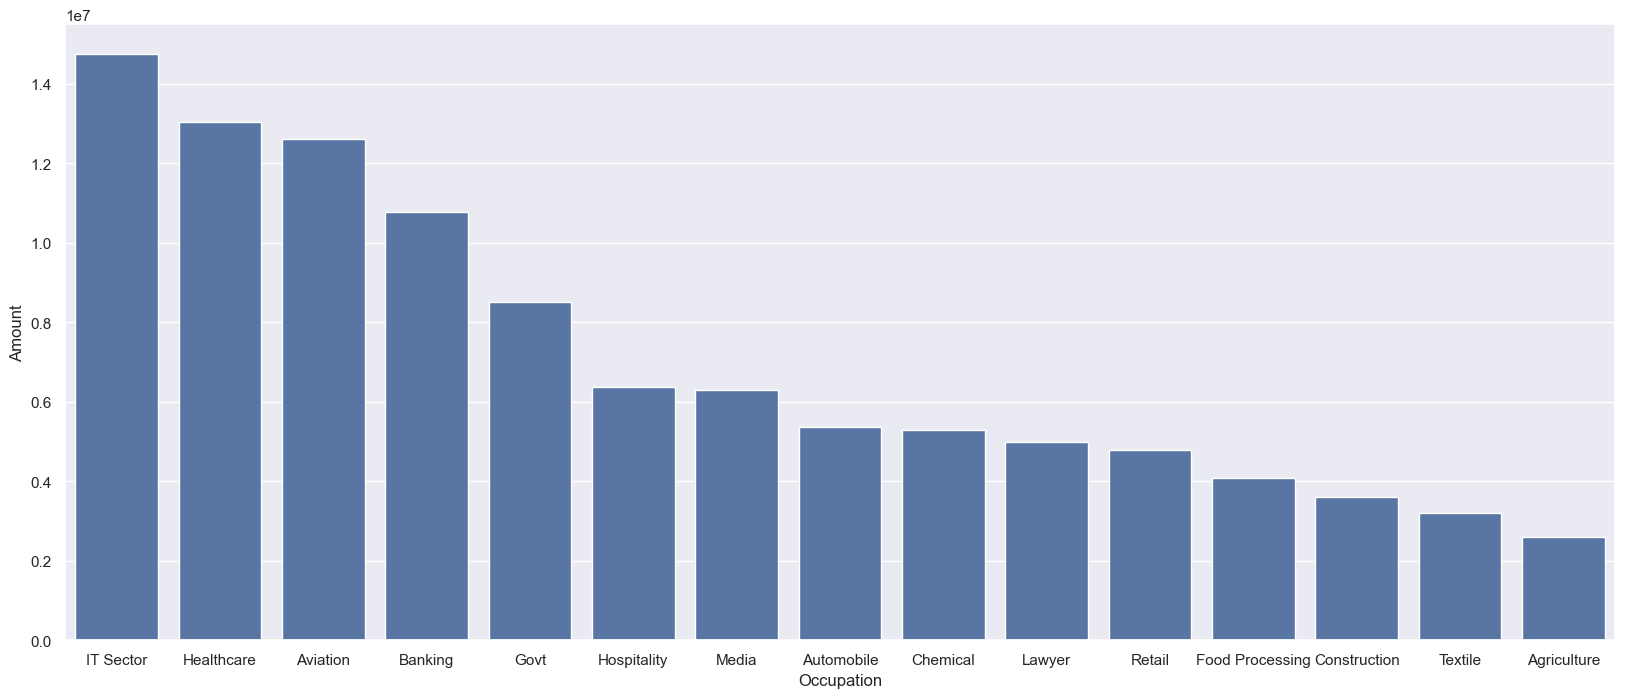

In [112]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount')

#### This above graph shows that most of our customers are from IT, Healthcare and Aviation sectors

In [114]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Married', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

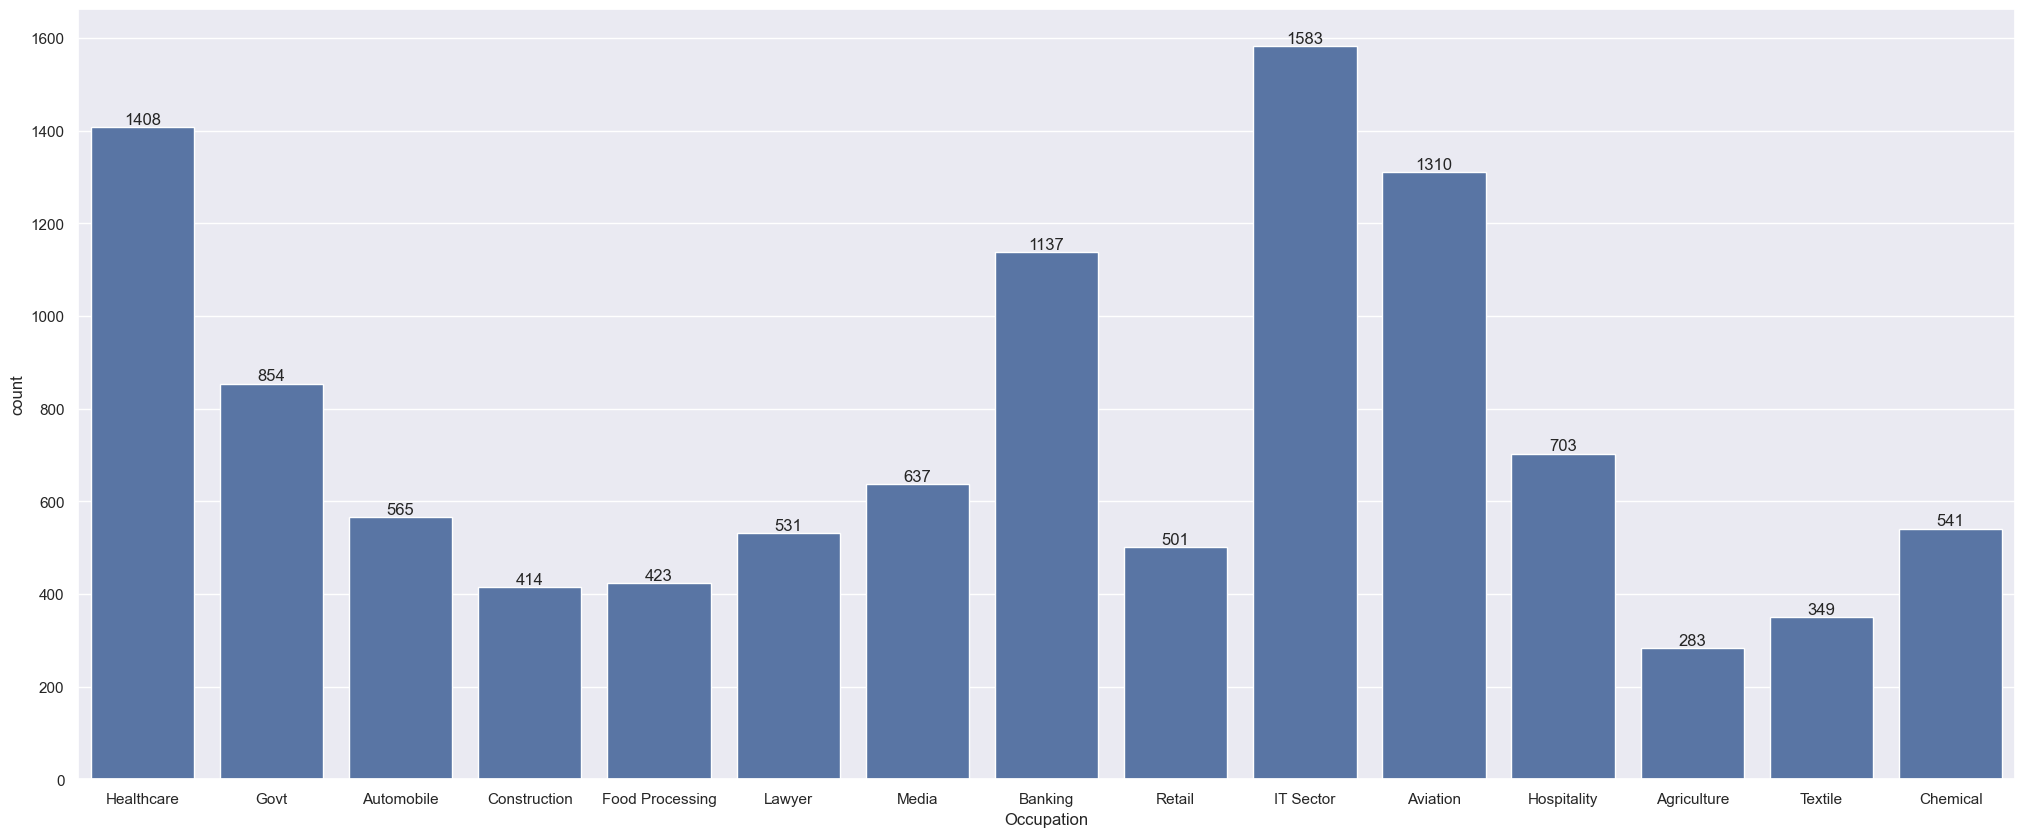

In [128]:
sns.set(rc = {'figure.figsize':(25,10)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

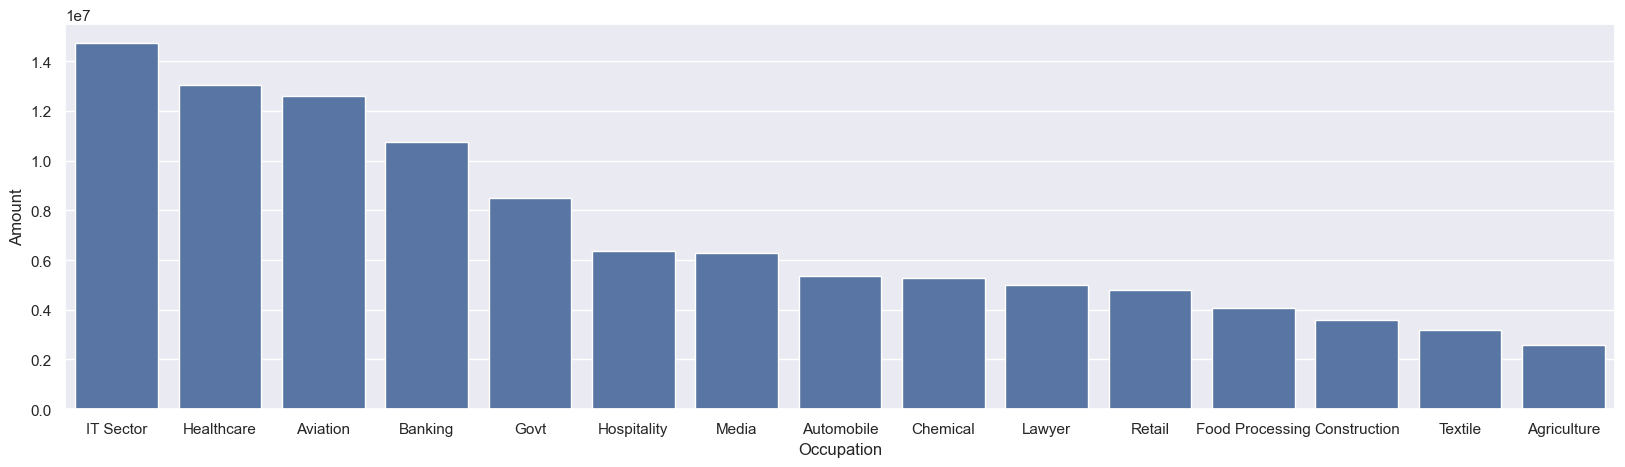

In [130]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount')

#### This above graph shows that the customers who spend more money are from IT, HealthCare and aviation sectors

In [132]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Married', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

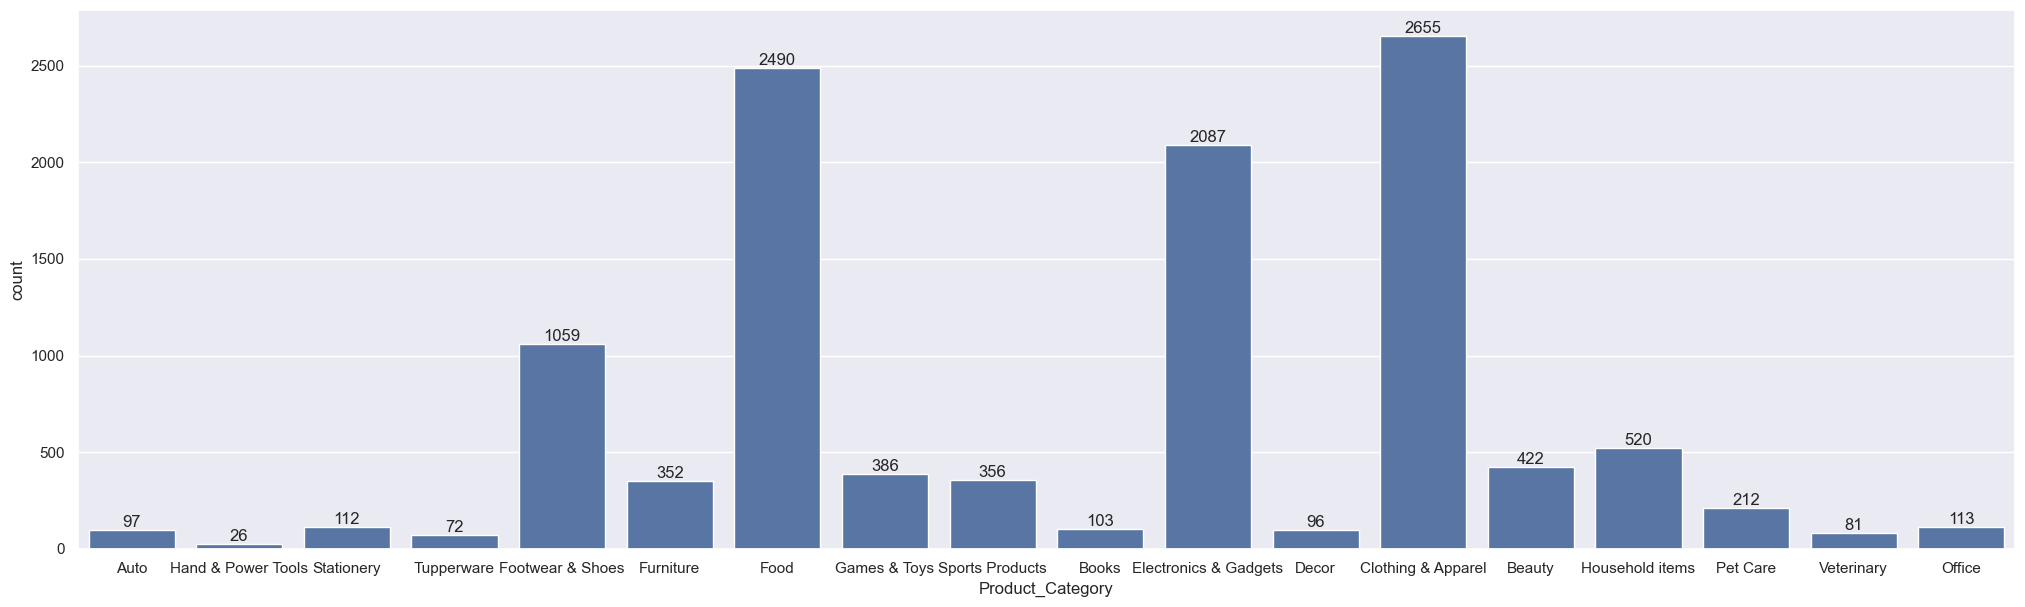

In [136]:
sns.set(rc = {'figure.figsize':(25,7)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

#### This graph shows that people's mostly buy's food, cloths and electronic gadgets from out store

<Axes: xlabel='Product_Category', ylabel='Amount'>

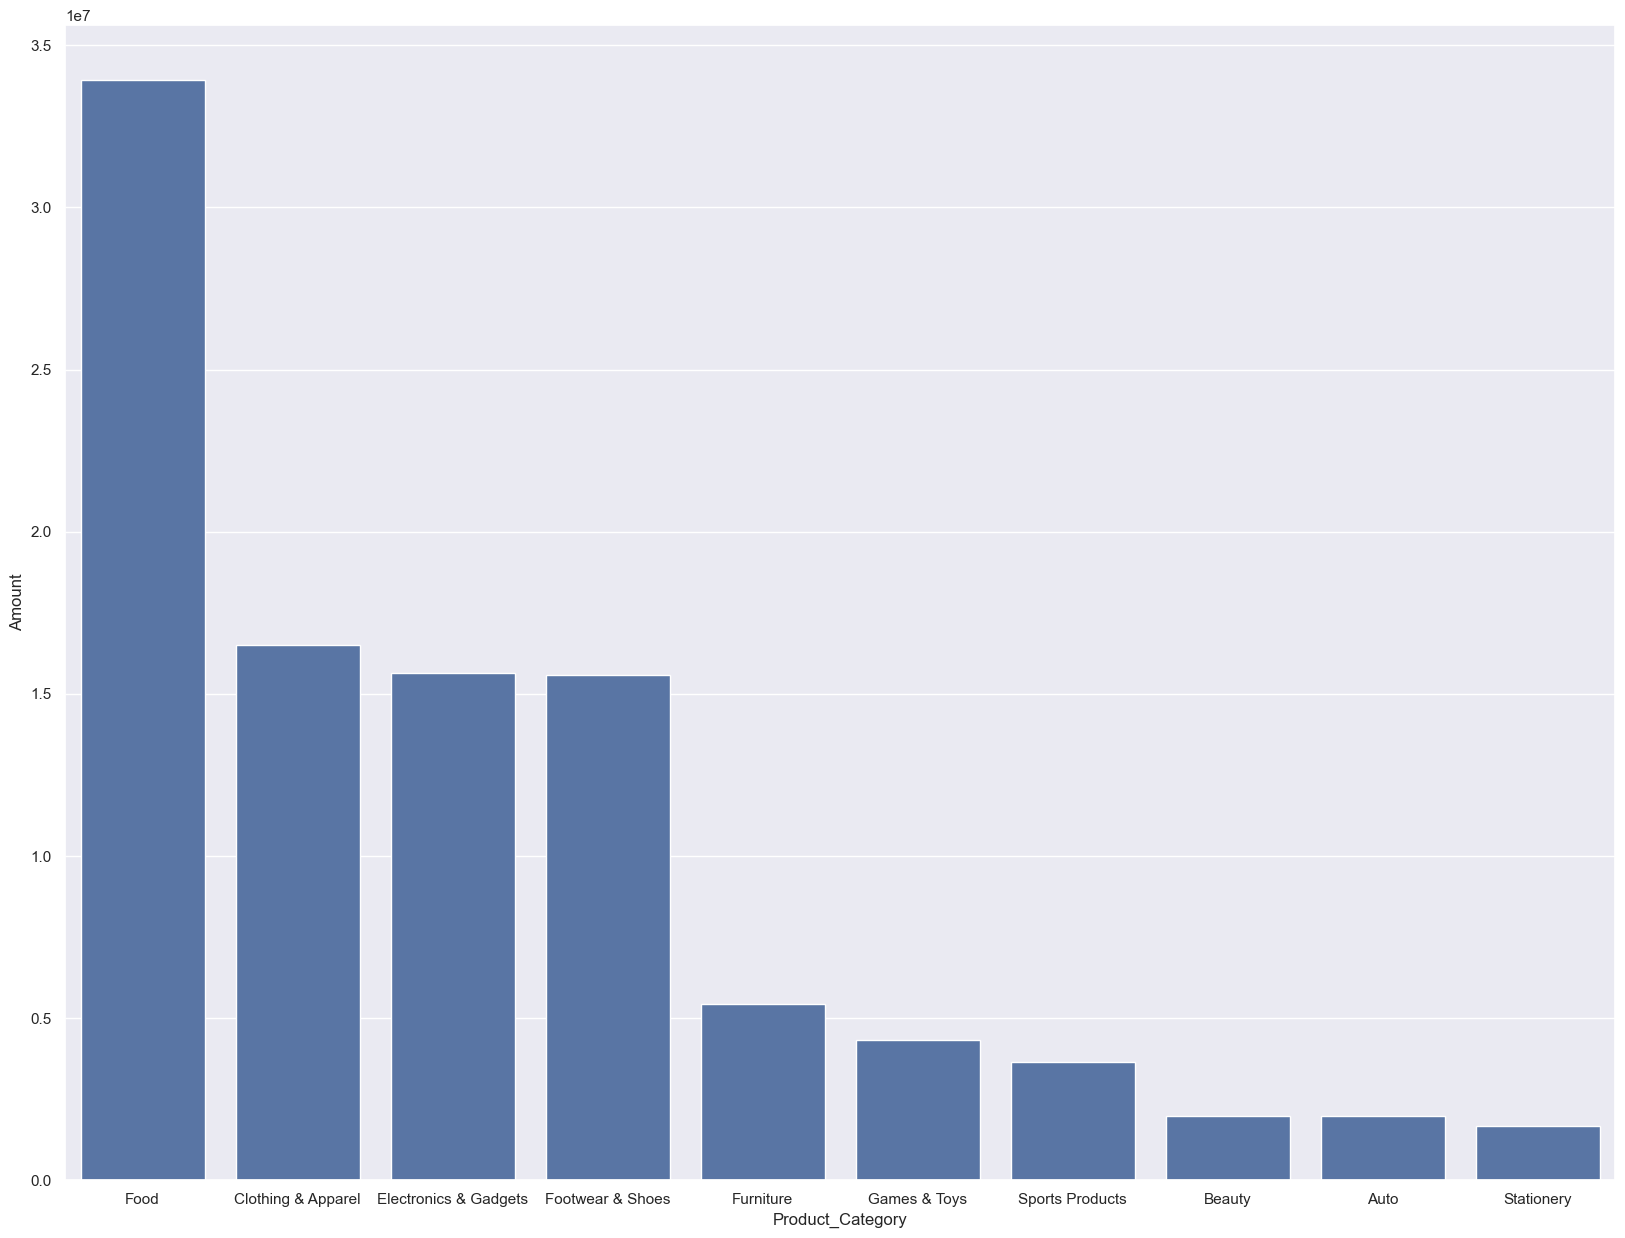

In [170]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,15)})
sns.barplot(data = sales_state, x = 'Product_Category', y = 'Amount')

#### This graph shows that people's mostly spend money on Food, Clothing and Electronic gadgets

<Axes: xlabel='Product_ID', ylabel='Orders'>

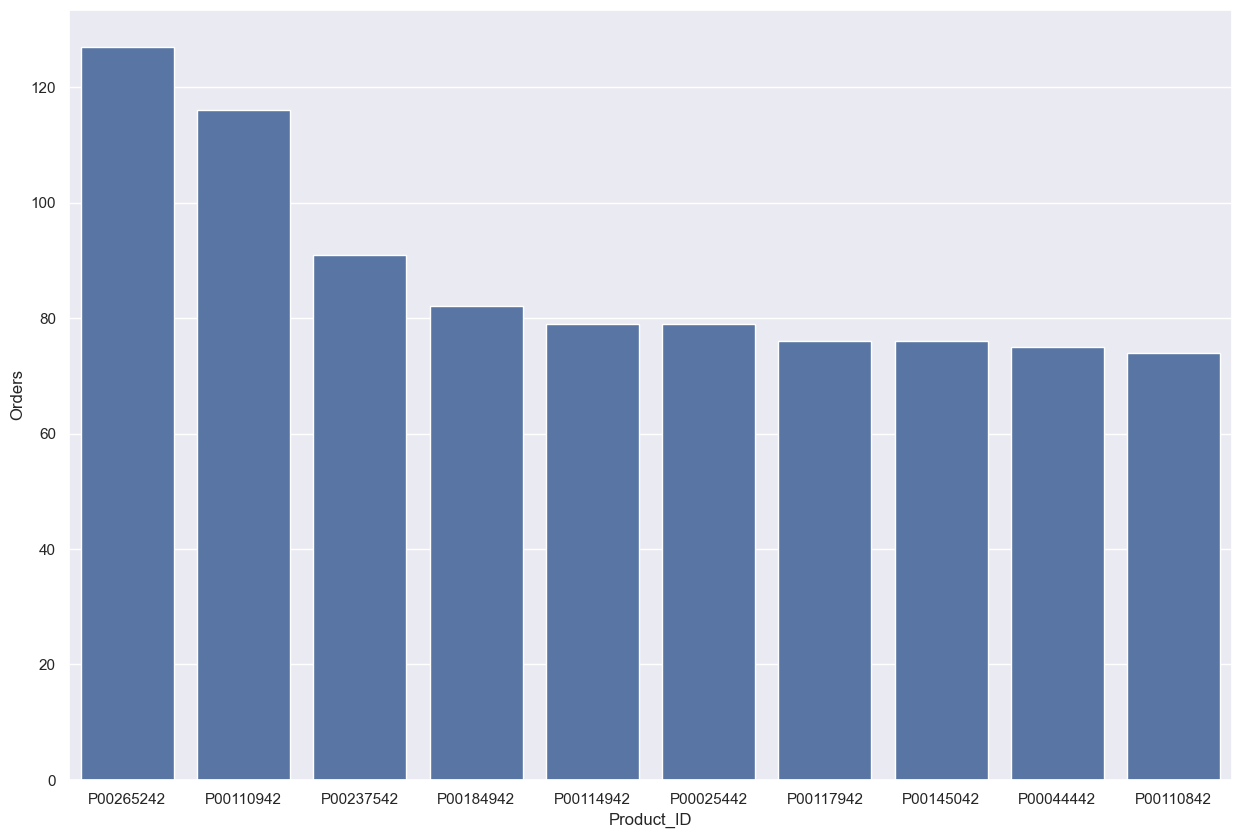

In [168]:
sales_state = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set({'figure.figsize':(15,10)})
sns.barplot(data = sales_state, x = 'Product_ID', y = 'Orders')

#### This graph shows that the Product_ID: P00265242 is the most selling product followed by P00110942 and P00237542

<Axes: xlabel='Product_ID'>

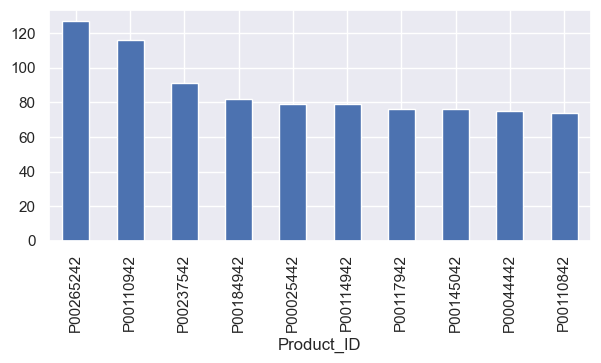

In [174]:
fig1, ax1 = plt.subplots(figsize=(7,3))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')

# Conclusion

Married Women of age group 26-35 years from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation sectors are more likely to buy products from Food, Clothing and Electronics Category.